In [1]:
#improting nessacery libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import scikitplot as skplt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import RandomizedSearchCV

df =pd.read_csv("indian_liver_patient.csv")
style.use("fivethirtyeight")

D:\Anaconda\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Preproccesing 

In [2]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [4]:
df.shape

(583, 11)

In [5]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
#dealing with null entries
df[["Albumin_and_Globulin_Ratio"]]=df[["Albumin_and_Globulin_Ratio"]].fillna(df[["Albumin_and_Globulin_Ratio"]].median()) #replacing with median value

In [7]:
df.isnull().sum().sum()

0

In [8]:
#replacing categorical data
df['Gender'].replace(['Male','Female'],[1,0],inplace=True) # 1 =male, 0 = female
df['Gender'].value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    int64  
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(6)
memory usage: 50.2 KB


# Data Smoting


In [10]:
X = df.drop('Dataset',axis=1)
y = df['Dataset']
print("X shape ",X.shape)
print("y shape ",y.shape)

X shape  (583, 10)
y shape  (583,)


In [11]:
y.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

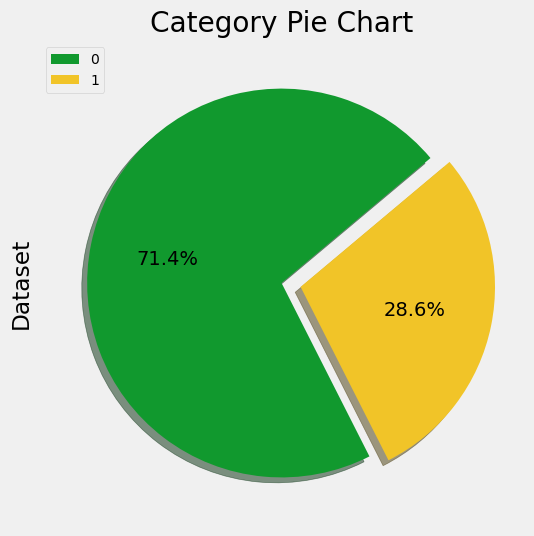

In [12]:
# understanding the target column
explode_list = [0, 0.1,]
colour = ["#11992E","#F1C428"]
plt.figure(figsize=(6,6))
df['Dataset'].value_counts().plot(kind='pie',
                                      autopct='%1.1f%%', 
                                      shadow=True,
                                      startangle=40,
                                      colors = colour,
                                      labels = None,
                                      explode=explode_list)
plt.title('Category Pie Chart')
plt.legend(labels=df.index, loc='upper left', fontsize=10) 
plt.show()

In [13]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X,y)
print("X shape ",X.shape)
print("y shape ",y.shape)

X shape  (832, 10)
y shape  (832,)


In [14]:
y.value_counts()

1    416
2    416
Name: Dataset, dtype: int64

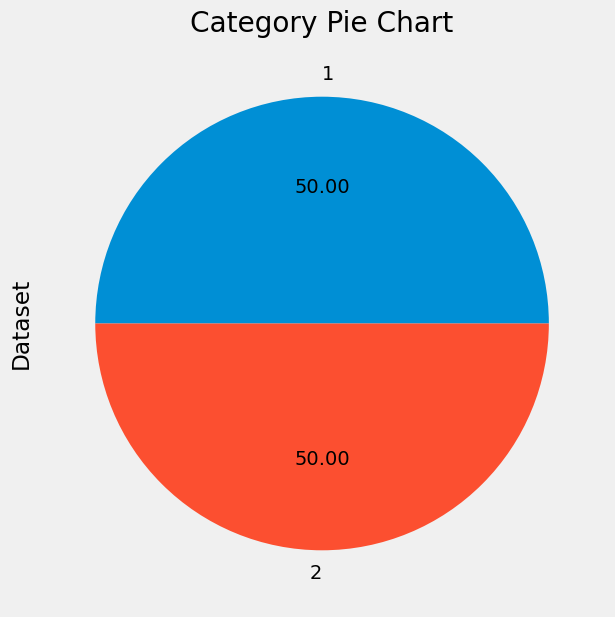

1    416
2    416
Name: Dataset, dtype: int64

In [15]:
#Balancing the dataset
plt.figure(figsize=(7,7))
y.value_counts().plot(kind='pie',autopct='%.2f',)
plt.title('Category Pie Chart')
plt.show()
y.value_counts()

# Scaling

In [16]:
numeric_columns = []
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        numeric_columns.append(col)

In [17]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
df[numeric_columns] =ssc.fit_transform(df[numeric_columns])

In [18]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,1.252098,-1.762281,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147529,-0.633595
1,1.066637,0.567446,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650323,-0.633595
2,1.066637,0.567446,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.178953,-0.633595
3,0.819356,0.567446,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166718,-0.633595
4,1.684839,0.567446,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.718760,-0.633595


In [19]:
#spliting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,random_state=25, test_size =0.2)

# KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [22]:
y_pred = knn.predict(X_test)

In [23]:
print('Train Accuracy ', accuracy_score(y_train, knn.predict(X_train)))
knn_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ',knn_test_acc)
print('Test Report :\n',classification_report(y_test, y_pred))

Train Accuracy  0.8105263157894737
Test Accuracy  0.7544910179640718
Test Report :
               precision    recall  f1-score   support

           1       0.81      0.68      0.74        85
           2       0.72      0.83      0.77        82

    accuracy                           0.75       167
   macro avg       0.76      0.76      0.75       167
weighted avg       0.76      0.75      0.75       167



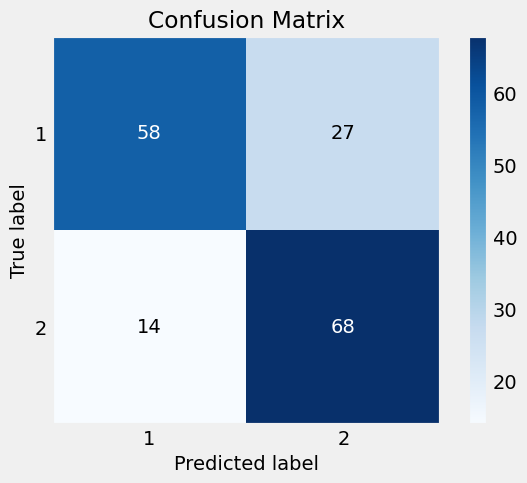

In [24]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);
#save_fig('Confusion Matrix knn')

# Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier 
dtree = DecisionTreeClassifier ()

In [26]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [27]:
y_pred = dtree.predict(X_test)

In [28]:
print('Train Accuracy ', accuracy_score(y_train, dtree.predict(X_train)))
dtree_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ',dtree_test_acc)
print('Test Report :\n',classification_report(y_test, y_pred))

Train Accuracy  1.0
Test Accuracy  0.7604790419161677
Test Report :
               precision    recall  f1-score   support

           1       0.76      0.78      0.77        85
           2       0.76      0.74      0.75        82

    accuracy                           0.76       167
   macro avg       0.76      0.76      0.76       167
weighted avg       0.76      0.76      0.76       167



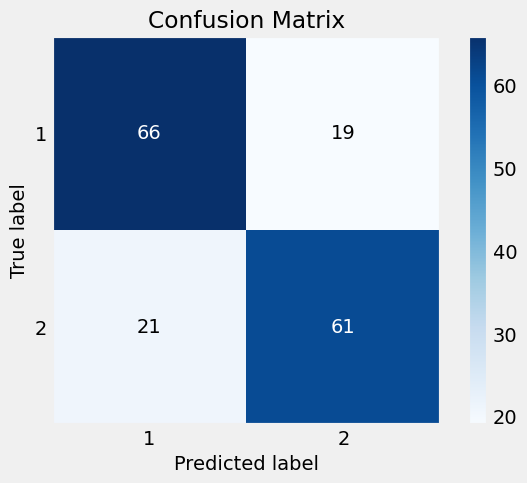

In [29]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

# Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier 
rnd = RandomForestClassifier ()

In [31]:
rnd.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred = rnd.predict(X_test)

In [33]:
print('Train Accuracy ', accuracy_score(y_train, rnd.predict(X_train)))
rnd_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ',rnd_test_acc)
print('Test Report :\n',classification_report(y_test, y_pred))

Train Accuracy  1.0
Test Accuracy  0.8203592814371258
Test Report :
               precision    recall  f1-score   support

           1       0.84      0.80      0.82        85
           2       0.80      0.84      0.82        82

    accuracy                           0.82       167
   macro avg       0.82      0.82      0.82       167
weighted avg       0.82      0.82      0.82       167



# Logistic Regression 

In [34]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()

In [35]:
lr.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(X_test)

In [37]:
print('Train Accuracy ', accuracy_score(y_train, lr.predict(X_train)))
lr_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ',lr_test_acc)
print('Test Report :\n',classification_report(y_test, y_pred))

Train Accuracy  0.7338345864661654
Test Accuracy  0.7305389221556886
Test Report :
               precision    recall  f1-score   support

           1       0.79      0.65      0.71        85
           2       0.69      0.82      0.75        82

    accuracy                           0.73       167
   macro avg       0.74      0.73      0.73       167
weighted avg       0.74      0.73      0.73       167



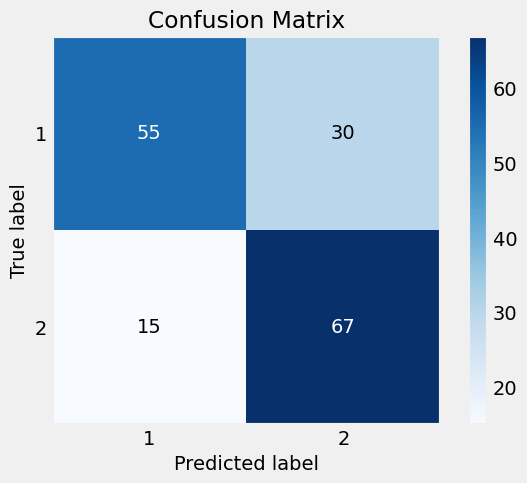

In [38]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

# SVM

In [39]:
from sklearn.svm import SVC
svm = SVC()

In [40]:
svm.fit(X_train,y_train)

SVC()

In [41]:
y_pred = svm.predict(X_test)

In [42]:
print('Train Accuracy ', accuracy_score(y_train, svm.predict(X_train)))
svm_test_acc = accuracy_score(y_test, y_pred)
print('Test Accuracy ',svm_test_acc)
print('Test Report :\n',classification_report(y_test, y_pred))

Train Accuracy  0.6736842105263158
Test Accuracy  0.7065868263473054
Test Report :
               precision    recall  f1-score   support

           1       0.79      0.58      0.67        85
           2       0.66      0.84      0.74        82

    accuracy                           0.71       167
   macro avg       0.72      0.71      0.70       167
weighted avg       0.72      0.71      0.70       167



# Voting Classifier(Hard)

In [43]:
from sklearn.ensemble import  VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('knear', knn),
        ('log_reg', lr),
        ('dt', dtree),
        ('svc', svm)
    ], 
    voting = 'hard'
)

In [44]:
for clf in [knn, lr, dtree, svm, voting_clf]:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

KNeighborsClassifier 0.7544910179640718
LogisticRegression 0.7305389221556886
DecisionTreeClassifier 0.7425149700598802
SVC 0.7065868263473054
VotingClassifier 0.7544910179640718


# Model Comparison

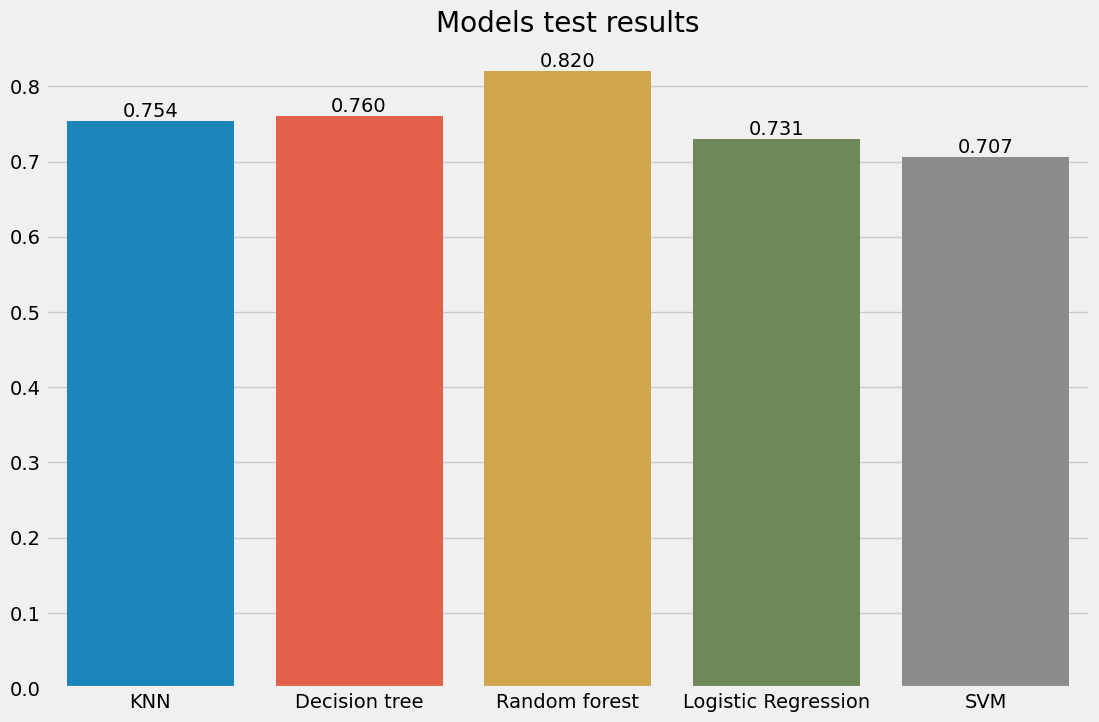

In [47]:
model_names = ['KNN','Decision tree','Random forest','Logistic Regression','SVM']
model_acc =[knn_test_acc,dtree_test_acc,rnd_test_acc,lr_test_acc,svm_test_acc]
#colours = ['#11992E','#996A11','#991B11','#118299','#565158']

plt.figure(figsize=(12, 8))
plt.title("Models test results")
ax = sns.barplot(model_names,x=model_names, y=model_acc,)
ax.bar_label(ax.containers[0],fmt='%.3f');

In [49]:
import tensorflow as tf